# Central London Data Science Project Nights
### Intro to OpenCV: Installation and Edge Detection

Before you start you will need to download openCV - for this I recommend using one of the unofficial windows binaries for
python extension packages. To find one for OpenCV head to: 

http://www.lfd.uci.edu/~gohlke/pythonlibs/#opencv 

and download a suitable wheel file. Once installed then open command prompt and install the download with something like:

```
pip install C:/Downloads/opencv_python-3.1.0-cp35-cp35m-win_amd64.whl
```

Hopefully you will be greeted with no errors, and the following will import both openCV and numpy ready to handle our first image. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print(cv2.__version__)

3.1.0


Before we start with corner detection, let's first acquire a suitably simple image. For this I have chosen a simple png picture of a chesboard:

http://www.sanarias.com/static/img/chessboard.jpg

So download that somewhere sensible and carry on (I have commented out the example that would use a local image and instead I have acquired an image using the URL - either works).

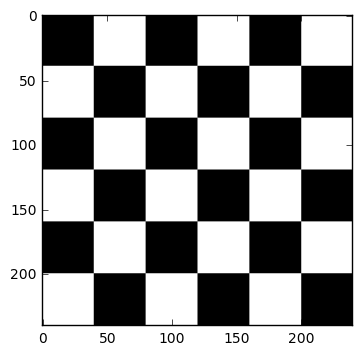

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,

In [13]:
## The following two lines would read a local image
# filename = "C:\\Users\\Oliver\\Desktop\\chessboard.png"
# img = cv2.imread(filename)

## Or we can specify the url and acquire it from there

from skimage import io

url = "http://www.sanarias.com/static/img/chessboard.jpg"
img = io.imread(url)

# plot our image 
plt.imshow(img)
plt.show()


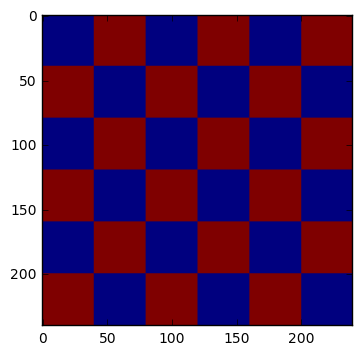

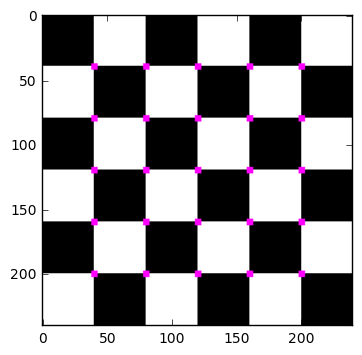

In [3]:
# %%
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image. Let's choose 0.01 here as in the opencv.docs
img[dst > 0.1 * dst.max()] = [255, 0, 255]

plt.imshow(img)
plt.show()


And that's not too bad! Admittedly not the most complex image to start with, but let's try something more challenging then:

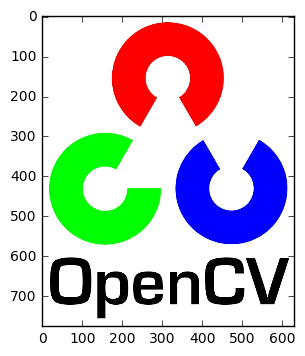

(776, 630, 3)

In [19]:
# %%
filename2 = "C:\\Users\\Oliver\\Desktop\\opencv.png"
img2 = cv2.imread(filename2)

url2 = "http://www.cloudcv.org/static/img/opencv.jpg"
img2 = io.imread(url2)

img2_1 = img2_2 = img2

plt.imshow(img2)
plt.show()
img2.shape


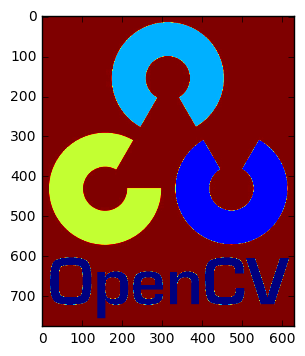

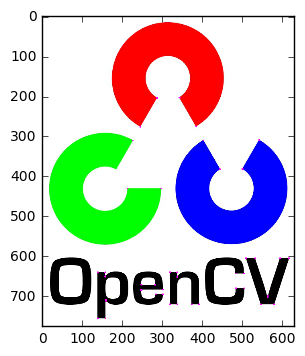

In [20]:
# As before we will first convert the images color scale
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
gray2 = np.float32(gray2)

# Let's also have a look at the color convert this time
plt.imshow(gray2)
plt.show()

# Isolate corners with the same parameters as before and dilate
dst2 = cv2.cornerHarris(gray2, 2, 3, 0.04)
dst2 = cv2.dilate(dst2, None)

# Threshold for an optimal value, it may vary depending on the image. Let's choose 0.01 here as before
img2_1[dst2 > 0.01 * dst2.max()] = [255, 0, 255]

plt.imshow(img2_1)
plt.show()

The corner detection, without changing any parameters is still able to correctly identify some corners, and some of the text. However if we play around with the parameters of the threshold detection we'll be able to produce better results. 

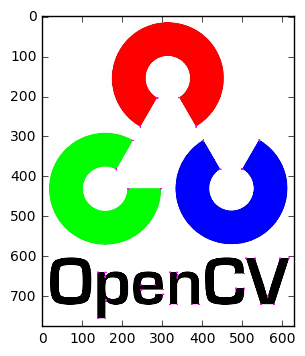

In [21]:
# Threshold for an optimal value, it may vary depending on the image. Let's choose 0.001 here to lower the threshold 
img2_2[dst2 > 0.0001 * dst2.max()] = [255, 0, 255]

plt.imshow(img2_2)
plt.show()

We can now see that the lower threshold is able to capture the missing corners on the green shape. 

---

This is a very brief overview of this individual use of the openCV software, using the Harris corner estimation algorithm (docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html). Hopefully we might have time to come back to OpenCV in a future meetup with a problem/challenge of where we could use OpenCV within prediction model frameworks. 